## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#mouse_metadata_path.type()
#study_results_path 

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#type(mouse_metadata)
#type(study_results)

# Combine the data into a single dataset

#mouse_metadata_path.join(mouse_metadata_path, how='outer')
study_results = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

#length before adding row 
length1 = len(study_results) 

# Display the data table for preview

study_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
length1

1893

In [3]:
# Checking the number of mice.

#study_results.count()

In [4]:
#type(study_results)

In [5]:
#study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')


In [6]:
#study_results.count()

In [7]:
#study_results.dtypes

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_drop = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

#study_results_drop

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])] 

duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_drop = study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

study_results_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
col = list(study_results_drop.columns)
col

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [12]:
# Checking the number of mice in the clean DataFrame.
study_results_drop.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

study_groupby_df = study_results_drop.groupby(['Drug Regimen'])

tumor_mean = study_groupby_df.mean()['Tumor Volume (mm3)']
tumor_median = study_groupby_df.median()['Tumor Volume (mm3)']
tumor_var = study_groupby_df.var()['Tumor Volume (mm3)']
tumor_sem = study_groupby_df.sem()['Tumor Volume (mm3)']
tumor_std = study_groupby_df.std()['Tumor Volume (mm3)']

summary_grouped_df = pd.DataFrame({'Mean Tumor Volume (mm3)': tumor_mean, 'Median Tumor Volume (mm3)': tumor_median, 'Variance Tumor Volume (mm3)': tumor_var,
                                   'Standard Deviation Tumor Volume (mm3)': tumor_std, 'SEM Tumor Volume (mm3)': tumor_sem})

summary_grouped_df.round(3).head()

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

merge_all_df =pd.DataFrame({"Mean Tumor Volume (mm3)":tumor_mean, "Median Tumor Volume (mm3)":tumor_median, "Variance Tumor Volume (mm3)":tumor_var, "Standard Deviation Tumor Volume (mm3)": tumor_std, "SEM Tumor Volume (mm3)": tumor_sem})


#groupby summary table - rounded 3 places
merge_all_df.round(3).head()

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596


In [15]:
#tumor_std 

In [16]:
study_results_drop.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [17]:
type(study_results_drop)

pandas.core.frame.DataFrame

## Bar and Pie Charts

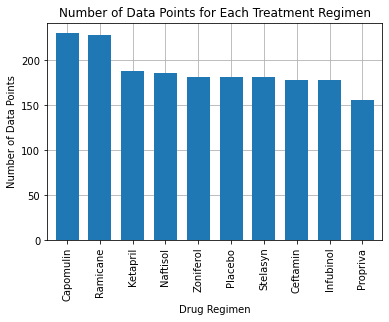

In [18]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])
bar_plot = study_results_drop['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

plt.savefig("Plot/bar-pandas.png")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)

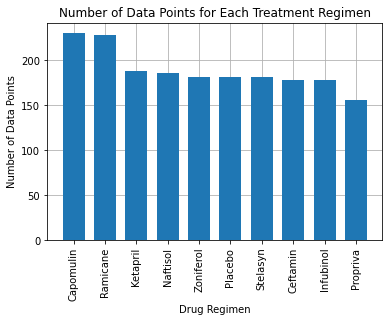

In [19]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Calculate the amount of data points for each drug regimen
counts = study_results_drop['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = .7, zorder=3)

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

plt.savefig("Plot/bar-pyplot.png")

# Display resulting plot
plt.show()



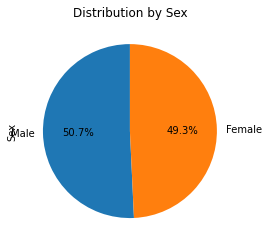

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_pd = study_results_drop['Sex'].value_counts()

pie_plot = pie_pd.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

plt.savefig("Plot/pie-pandas.png")


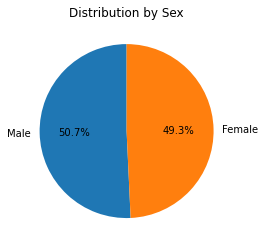

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_mpl = study_results_drop['Sex'].value_counts()

plt.pie(pie_mpl, labels=pie_mpl.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

plt.savefig("Plot/pie-pyplot.png")

plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

Q_O_B_df = study_results_drop.drop(['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'], axis = 1) 

Q_O_B_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1888,z969,Naftisol,25,63.145652
1889,z969,Naftisol,30,65.841013
1890,z969,Naftisol,35,69.176246
1891,z969,Naftisol,40,70.314904


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_drugs = Q_O_B_df[Q_O_B_df['Drug Regimen'].isin(drugs)]

final_drugs

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729
...,...,...,...,...
1868,z581,Infubinol,25,54.316407
1869,z581,Infubinol,30,56.286750
1870,z581,Infubinol,35,58.628399
1871,z581,Infubinol,40,60.053740


In [25]:
# Then groupby 'Mouse ID' and use the .agg method and chain a round method to output 3 digits after the zero
#Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
final_four_regimen = final_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
       
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
final_four_regimen

Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [26]:
# Reshape dataframe with Drug Regimen as columns by using unstack, also move Last_tumor_size to index using stack
final_four_regimen_unstack = final_four_regimen.stack(level=0).unstack(level=0)
# View the result to confirm transpose
final_four_regimen_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,38.408
a444,Last_tumor_size,NaN,NaN,NaN,43.048


In [27]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0

# Do quartile calculations for each drug
for drug in drugs:
    quartiles = final_four_regimen_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check if it is the first time through the for loop, if so then print dividing line at top only
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.


In [28]:
# Create empty list to fill with tumor vol data (for plotting)

# Create an empty list
box_list = []

# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the box_list
for drug in drugs:
    box_list.append(list(final_four_regimen_unstack[drug].dropna()))

In [29]:
# Start by getting the last (greatest) timepoint for each mouse

max_tp_df = pd.DataFrame(final_drugs.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df


,Mouse ID,max_timepoint
0,t573,0
1,u153,0
2,x226,0
3,b447,0
4,v339,5
...,...,...
95,j119,45
96,i738,45
97,i557,45
98,o287,45


In [30]:
Box and whisker plots
Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

Hint: All four box plots should be within the same figure. Use this Matplotlib documentation page for help with changing the style of the outliers.

SyntaxError: invalid syntax (<ipython-input-30-3d3ccb4c2016>, line 1)

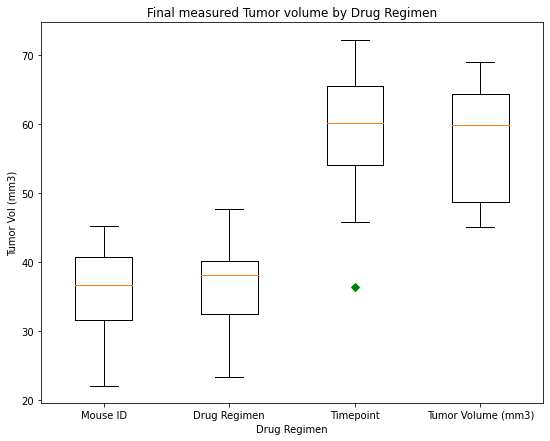

In [31]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(box_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],final_drugs)

# Save the figure
plt.savefig("Plot/BoxWhiskerPlot.png")

plt.show()


## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
study_groupby_df

drug_regimen = study_results_drop.loc[study_results_drop["Drug Regimen"] == 'Capomulin']

drug_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [33]:
mouse = study_results_drop.loc[study_results_drop['Mouse ID'] == 's185']

mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume (mm3)')

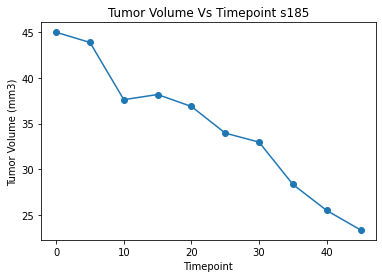

In [34]:
plt.plot(mouse['Timepoint' ], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.title('Tumor Volume Vs Timepoint s185')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

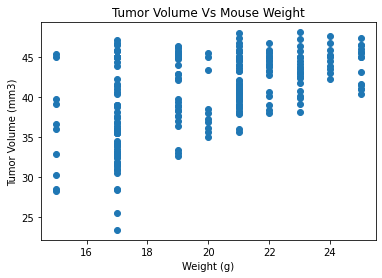

In [35]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(drug_regimen['Weight (g)'], drug_regimen['Tumor Volume (mm3)'], marker = 'o')
plt.title('Tumor Volume Vs Mouse Weight')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
